In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time
import os
import cv2
from matplotlib import pyplot

X = []
Y = []
IMAGE_SIZE= (300, 300)

fireImagesPath = "/content/drive/My Drive/fire_dataset/fire_images"
nonFireImagesPath = "/content/drive/My Drive/fire_dataset/non_fire_images"

# getting the fire_images from the file
for _,_,files in os.walk(fireImagesPath, topdown=True):
  for file in files:
    imagePath = fireImagesPath + "/" + file
    img = cv2.imread(imagePath) # image as numpy array in BGR format.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converts BGR format to RGB format
    img = cv2.resize(img, IMAGE_SIZE, interpolation=cv2.INTER_AREA) # converting all images to the same size
    X.append(img / 255.0) # normalizing image by dividing to 255.
    Y.append(1) # adding the labe of class(1 = there is a fire)
    

# getting the non_fire_images from the file
for _,_,files in os.walk(nonFireImagesPath, topdown=True):
  for file in files:
    imagePath = nonFireImagesPath + "/" + file
    img = cv2.imread(imagePath) # image as numpy array in BGR format.
    if img is not None: # ONE OF THE IMAGES IS BROKEN IN THIS FILE, HENCE IT CAUSED ERROR
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converts BGR format to RGB format
      img = cv2.resize(img, IMAGE_SIZE, interpolation=cv2.INTER_AREA) # converting all images to the same size
      X.append(img / 255.0) # normalizing image by dividing it to 255.
      Y.append(0) # adding the labe of class(0 = there is NO a fire)
    else:
      print(file)

non_fire.189.png
CPU times: user 38 s, sys: 1.67 s, total: 39.7 s
Wall time: 16min 30s


In [ ]:
import numpy as np

# Reshaping data
X = np.array(X).reshape(-1, 300, 300, 3)
Y = np.array(Y).reshape(len(Y),)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (998, 300, 300, 3)
Shape of Y: (998,)


In [ ]:
numberOfClass0 = np.sum(Y == 0)
numberOfClass1 = np.sum(Y == 1)
print("Number of images which belongs to class 0(no fire) = ", numberOfClass0)
print("Number of images which belongs to class 1(fire) = ", numberOfClass1)

Number of images which belongs to class 0(no fire) =  243
Number of images which belongs to class 1(fire) =  755


In [ ]:
# %%time
# # DATA AUGMENTATION
# # We need 512 more images which belongs to class 0.

# # Creating the matrices that will be used for transformation
# ROTATION_MATRIX = cv2.getRotationMatrix2D((300/2,300/2), 60, 1.0) # matrix that is used for rotating an image 60 degrees
# RIGHT_SHIFTING_MATRIX = np.float32([[1,0,10], [0,1,0]]) # matrix that is used for shifting the image right by 10.

# def transformImage(img):
#   # gets an image as a parameter and returns a list of transformed versions of that image
#   rotatedImage = cv2.warpAffine(img, ROTATION_MATRIX, (300,300), borderMode=cv2.BORDER_REPLICATE) # BORDER_REPLICATE fills the black backgorund caused by transformation
#   shiftedImage = cv2.warpAffine(img, RIGHT_SHIFTING_MATRIX, (300,300), borderMode=cv2.BORDER_REPLICATE)
  
#   return [rotatedImage, shiftedImage]

# for i in range(0, Y.shape[0]):
#   if Y[i] == 0:
#     img = X[i]
#     transformedImages = transformImage(img)

#     preShape_X = X.shape
#     X = np.append(X, transformedImages[0])
#     X = np.append(X, transformedImages[1])
#     X = X.reshape(preShape_X[0]+ 1 +1, 300, 300, 3)


#     preShape_Y = Y.shape
#     Y = np.append(Y, 0)
#     Y = np.append(Y, 0)
#     Y = Y.reshape(preShape_Y[0] + 2,)


In [ ]:
# print("Shape of X:", X.shape)
# print("Shape of Y:", Y.shape)
# numberOfClass0 = np.sum(Y == 0)
# numberOfClass1 = np.sum(Y == 1)
# print("Number of images which belongs to class 0(no fire) = ", numberOfClass0)
# print("Number of images which belongs to class 1(fire) = ", numberOfClass1)

In [ ]:
# # Showing sample images from augmented data
# for i in range(9):
#   pyplot.subplot(330 + 1 + i)
#   pyplot.imshow(X[-1 * i])

# pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size = 0.1, shuffle=True, stratify=Y, random_state=1)
X_TRAIN, X_VALID, Y_TRAIN, Y_VALID = train_test_split(X_TRAIN, Y_TRAIN, test_size = 0.2, shuffle=True, stratify=Y_TRAIN, random_state=2)


print("Shape of X_TRAIN:", X_TRAIN.shape)
print("Shape of Y_TRAIN:", Y_TRAIN.shape, "\n")
print("Shape of X_VALID:", X_VALID.shape)
print("Shape of Y_VALID:", Y_VALID.shape, "\n")
print("Shape of X_TEST:", X_TEST.shape)
print("Shape of Y_TEST:", Y_TEST.shape)

Shape of X_TRAIN: (718, 300, 300, 3)
Shape of Y_TRAIN: (718,) 

Shape of X_VALID: (180, 300, 300, 3)
Shape of Y_VALID: (180,) 

Shape of X_TEST: (100, 300, 300, 3)
Shape of Y_TEST: (100,)


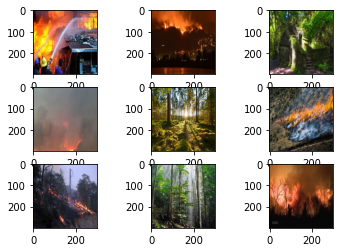

In [ ]:
import random
sample = random.sample(range(1, 100), 9)

for i in range(9):
  n = sample[i]
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_TEST[n])

pyplot.show()

In [ ]:
# How classes are splitted in the training part of the data.

unique, counts = np.unique(Y_TRAIN, return_counts=True)
print("Class distributions in training data: \n")
value_counts = np.asarray((unique, counts)).T
print (value_counts)

Class distributions in training data: 

[[  0 175]
 [  1 543]]


In [ ]:
# ADDING CLASS WEIGHTS. Giving higher weights to classes which has less number of occurences
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(Y_TRAIN), Y_TRAIN)
class_weights = {i : class_weights[i] for i in range(2)} # keras api accepts class_weights as dictionary insead of list in the fit() function
class_weights

{0: 2.0514285714285716, 1: 0.6611418047882136}

In [ ]:
import tensorflow as tf
# tf.test.gpu_device_name()
from tensorflow_addons import metrics


inceptionV3_base = tf.keras.applications.InceptionV3(
    input_shape=(300,300,3), 
    include_top=False,
    weights="imagenet"
    )
inceptionV3_base.trainable = False

model = tf.keras.Sequential()
model.add(inceptionV3_base)
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), strides=(1, 1), activation='relu'))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(1,1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy', metrics.F1Score(1)]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 6, 6, 512)         9437696   
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 4, 4, 128)         589952    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [ ]:
history_model = model.fit(
    x=X_TRAIN,
    y=Y_TRAIN,
    class_weight=class_weights,
    batch_size=64,
    epochs=10,
    validation_data=(X_VALID, Y_VALID)
)

Epoch 1/10
12/12 [==============================] - 6s 459ms/step - loss: 4.3293 - accuracy: 0.7646 - f1_score: 0.8653 - val_loss: 0.7173 - val_accuracy: 0.8389 - val_f1_score: 0.8608
Epoch 2/10
12/12 [==============================] - 4s 354ms/step - loss: 0.2749 - accuracy: 0.9415 - f1_score: 0.8612 - val_loss: 1.7666 - val_accuracy: 0.6889 - val_f1_score: 0.8608
Epoch 3/10
12/12 [==============================] - 4s 354ms/step - loss: 0.2519 - accuracy: 0.9318 - f1_score: 0.8612 - val_loss: 0.2249 - val_accuracy: 0.9667 - val_f1_score: 0.8608
Epoch 4/10
12/12 [==============================] - 4s 355ms/step - loss: 0.0795 - accuracy: 0.9833 - f1_score: 0.8612 - val_loss: 0.2341 - val_accuracy: 0.9444 - val_f1_score: 0.8608
Epoch 5/10
12/12 [==============================] - 4s 355ms/step - loss: 0.0589 - accuracy: 0.9777 - f1_score: 0.8612 - val_loss: 0.3030 - val_accuracy: 0.9333 - val_f1_score: 0.8608
Epoch 6/10
12/12 [==============================] - 4s 355ms/step - loss: 0.0716

In [ ]:
# Increasing the number of images in test data for more accurate testing.

ROTATION_MATRIX = cv2.getRotationMatrix2D((300/2,300/2), 60, 1.0) # matrix that is used for rotating an image 60 degrees
RIGHT_SHIFTING_MATRIX = np.float32([[1,0,10], [0,1,0]]) # matrix that is used for shifting the image right by 10.

def transformImage(img):
  rotatedImage = cv2.warpAffine(img, ROTATION_MATRIX, (300,300), borderMode=cv2.BORDER_REPLICATE) # BORDER_REPLICATE fills the black backgorund caused by transformation
  shiftedImage = cv2.warpAffine(img, RIGHT_SHIFTING_MATRIX, (300,300), borderMode=cv2.BORDER_REPLICATE)
  
  return [rotatedImage, shiftedImage]

for i in range(0, Y_TEST.shape[0]):
  if Y_TEST[i] == 0:
    img = X_TEST[i]
    transformedImages = transformImage(img)

    preShape_X = X_TEST.shape
    X_TEST = np.append(X_TEST, transformedImages[0])
    X_TEST = np.append(X_TEST, transformedImages[1])
    X_TEST = X_TEST.reshape(preShape_X[0]+ 1 +1, 300, 300, 3)


    preShape_Y = Y_TEST.shape
    Y_TEST = np.append(Y_TEST, 0)
    Y_TEST = np.append(Y_TEST, 0)
    Y_TEST = Y_TEST.reshape(preShape_Y[0] + 2,)

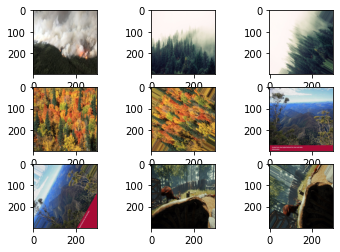

In [ ]:
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_TEST[-1 * i])

pyplot.show()

In [ ]:
unique, counts = np.unique(Y_TEST, return_counts=True)
print("Class distributions in training data: \n")
value_counts = np.asarray((unique, counts)).T
print (value_counts)

Class distributions in training data: 

[[ 0 72]
 [ 1 76]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# activation function "sigmoid" in the last layer returns a probability between [0, 1].
# That's why model.predict() returns a numpy array of probabilities.
# Closer the probability to 1 means more sure the model is that input belongs to class 1.
# So, we should infer the class by looking at the probability. A naive threshold is 0.5
#   -> if the probability is greater than 0.5 than it will inferred as class 1 otherwise it will be inferred as class 0.

pProbArr = model.predict(x=X_TEST, batch_size=64)
Y_PRED = np.asarray([1 if pProbArr[i] > 0.5 else 0 for i in range(len(pProbArr))])


print('Confusion Matrix:\n')
print(confusion_matrix(Y_TEST, Y_PRED))


print("\nClassification Report:\n")
print(classification_report(Y_TEST, Y_PRED))

Confusion Matrix:

[[71  1]
 [ 4 72]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.99      0.95      0.97        76

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148



In [ ]:
# Saving the model

model.save('/content/drive/My Drive/model.h5')

In [ ]:
# Loading the saved model

from tensorflow.keras.models import load_model
savedModel = load_model('/content/drive/My Drive/model.h5')

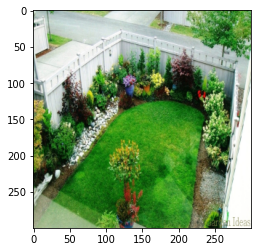

Predicted class for the above image: 0


In [ ]:
# Making predictions with the saved model.

imgFromDirectory = cv2.imread('/content/drive/My Drive/home2.jpg') # image as numpy array in BGR format.
imgFromDirectory = cv2.cvtColor(imgFromDirectory, cv2.COLOR_BGR2RGB) # converts BGR format to RGB format
imgFromDirectory = cv2.resize(imgFromDirectory, IMAGE_SIZE, interpolation=cv2.INTER_AREA) # converting all images to the same size
imgFromDirectory = (imgFromDirectory / 255.0) # normalizing image by dividing to 255.
imgFromDirectory = imgFromDirectory.reshape(1, 300, 300, 3)

predictionProbability = savedModel.predict(x=imgFromDirectory)
predictedClass = -1
if predictionProbability[0] > 0.5:
  predictedClass = 1
else:
  predictedClass = 0


pyplot.imshow(imgFromDirectory.reshape(300,300,3))
pyplot.show()
print("Predicted class for the above image:", predictedClass)

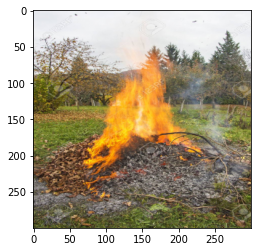

Predicted class for the above image: 1


In [ ]:
# Making predictions with the saved model.

imgFromDirectory = cv2.imread('/content/drive/My Drive/garden_Fire.jpg') # image as numpy array in BGR format.
imgFromDirectory = cv2.cvtColor(imgFromDirectory, cv2.COLOR_BGR2RGB) # converts BGR format to RGB format
imgFromDirectory = cv2.resize(imgFromDirectory, IMAGE_SIZE, interpolation=cv2.INTER_AREA) # converting all images to the same size
imgFromDirectory = (imgFromDirectory / 255.0) # normalizing image by dividing to 255.
imgFromDirectory = imgFromDirectory.reshape(1, 300, 300, 3)

predictionProbability = savedModel.predict(x=imgFromDirectory)
if predictionProbability[0] > 0.5:
  predictedClass = 1
else:
  predictedClass = 0

pyplot.imshow(imgFromDirectory.reshape(300, 300, 3))
pyplot.show()
print("Predicted class for the above image:", predictedClass)